Spherical trig can be used to combine rotations FROM SYMMETRICAL SETS.  
The following are generalized functions for the spherical law of sines and cosines:

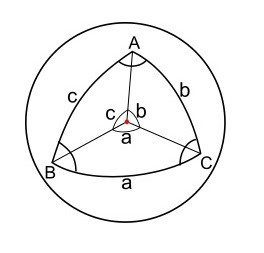


### Spherical Law of Sines
$\frac{\sin{A}}{\sin{a}}=\frac{\sin{B}}{\sin{b}}=\frac{\sin{C}}{\sin{c}}$ is generalized in the function `r = sphlos(x,y,z)` in the form $\frac{\sin{r}}{\sin{x}}=\frac{\sin{y}}{\sin{z}}$.  
In other words, `sphlos(x,y,z)` returns the value r.  
This is only generalizable in this form because of the symmetrical nature of the Spherical Law of Sines.


### Spherical Law of Cosines to find angle
$\cos{A}=-\cos{B}\cos{C}+\sin{B}\sin{C}\sin{a}$ is generalized in the function `r = sphloc_angle(x,y,z)` in the form:
* $\cos{r}=-\cos{x}\cos{y}+\sin{x}\sin{y}\sin{z}$.


### Spherical Law of Cosines to find side (arc) length
Likewise, $\cos{A}=-\cos{B}\cos{C}+\sin{B}\sin{C}\sin{a}$ is generalized in the function `r = sphloc_arc(x,y,z)` in the form:

* $\cos{x}=-\cos{y}\cos{z}+\sin{y}\sin{z}\sin{r}$.

In [1]:
import sympy as sm
import numpy as np
from numpy import sin, cos, tan, arcsin, arccos, arctan

def sphlos(x, y, z):
    '''
    Useable for any general combination of either:
        QTY 2 sides (arc lengths) and QTY 1 angle to find another angle, or...
        QTY 1 side (arc length) and QTY 2 angles and to another side (arc length)
        Just be consistent with which one is which
        
        ex. If you are seeking A, then input loc(a, B, b)
        ex. If you are seeking a, then input loc(A, b, B)
    '''
    return arcsin(sin(x)*sin(y)/sin(z))

def sphloc_angle(x, y, z):
    return arccos(-cos(x)*cos(y) + sin(x)*sin(y)*cos(z))

def sphloc_arc(x, y, z):
    return arccos(cos(x) + cos(y)*cos(z)/(sin(y)*sin(z)))

The following are generalized functions to calculate the relative angles between rotations (of symmetrical sets)

In [ ]:
def addRots(R1,R2):
    '''
    Add two consecutive symmetric R=(X-Y-X) rotations into one single (X-Y-X) rotation
    First rotation is R1 = (a,b,c)
    Second rotation is R2 = (d,e,f)
    '''
    a, b, c = R1[0], R1[1], R1[2]
    d, e, f = R2[0], R2[1], R2[2]
    psi2 = arccos(cos(b)*cos(e)-sin(b)*sin(e)*cos*(c+d))
    psi1 = a + arctan(sin(b)*sin(e)*sin(c+d)/(cos(e)-cos(b)*cos(psi2)))
    psi3 = f + arctan(sin(b)*sin(e)*sin(c+d)/(cos(b)-cos(e)*cos(psi2)))
    RF = (psi1, psi2, psi3)
    return RF

def subRots(R1,RF):
    '''
    Subtract one of two consecutive symmetric (X-Y-X) rotations from one single (X-Y-X) rotation
    First rotation is R1 = (a,b,c)
    Equivalent final rotation is RF = (d,e,f)
    '''
    a, b, c = R1[0], R1[1], R1[2]
    d, e, f = RF[0], RF[1], RF[2]
    phi2 = arccos(cos(b)*cos(e)+sin(b)*sin(e)*cos*(d-a))
    phi1 = -c + arctan(sin(b)*sin(e)*sin(d-a)/(cos(b)*cos(phi2)-cos(e)))
    phi3 = f - arctan(sin(b)*sin(e)*sin(d-a)/(cos(b)-cos(phi2)*cos(e)))
    R2 = (phi1, phi2, phi3)
    return R2